In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as stat

# Read in CSVs
city_data_df = pd.read_csv('Resources/city_data.csv')
ride_data_df = pd.read_csv('Resources/ride_data.csv')

In [9]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [11]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [12]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [13]:
sum(city_data_df.type == "Urban")

66

In [14]:
sum(city_data_df.type == "Suburban")

36

In [16]:
sum(city_data_df.type =="Rural")

18

In [17]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [18]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [19]:
pyber_data_df = ride_data_df.merge(city_data_df, how='left', on='city')
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [22]:
urban_data_df = pyber_data_df[pyber_data_df.type == "Urban"]
suburban_data_df = pyber_data_df[pyber_data_df.type == "Suburban"]
rural_data_df = pyber_data_df[pyber_data_df.type == "Rural"]

In [25]:
urban_ride_count = urban_data_df.groupby(["city"]).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [26]:
suburban_ride_count = suburban_data_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_data_df.groupby(['city']).count()['ride_id']

In [27]:
urban_fare_mean = urban_data_df.groupby(['city']).mean()['fare']
urban_fare_mean.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [28]:
suburban_fare_mean = suburban_data_df.groupby(['city']).mean()['fare']
rural_fare_mean = rural_data_df.groupby(['city']).mean()['fare']

In [32]:
urban_driver_count = urban_data_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [31]:
suburban_driver_count = suburban_data_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_data_df.groupby(['city']).mean()['driver_count']

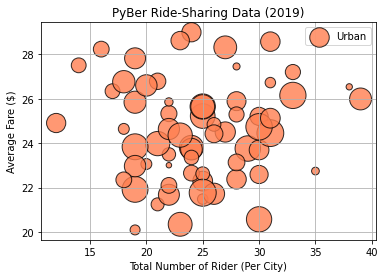

In [45]:
plt.scatter(urban_ride_count, urban_fare_mean,
            label="Urban", s= [10 * i for i in urban_driver_count],
            linewidths=1, edgecolors='k', c='coral', alpha=0.8)

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Riders (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()

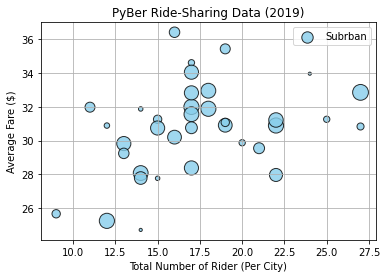

In [46]:
plt.scatter(suburban_ride_count, suburban_fare_mean,
            label="Subrban", s= [10 * i for i in suburban_driver_count],
            linewidths=1, edgecolors='k', c='skyblue', alpha=0.8)

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Riders (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()

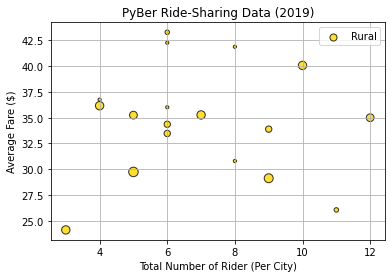

In [49]:
plt.scatter(rural_ride_count, rural_fare_mean,
            label="Rural", s= [10 * i for i in rural_driver_count],
            linewidths=1, edgecolors='k', c='gold', alpha=0.8)

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Riders (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()

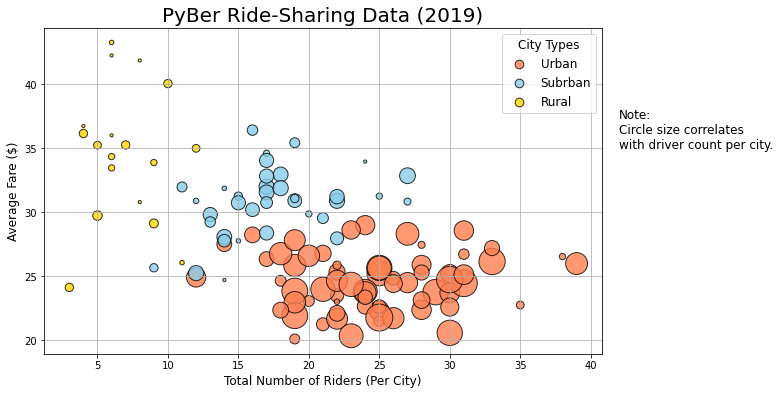

In [62]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_fare_mean,
            label="Urban", s= [10 * i for i in urban_driver_count],
            linewidths=1, edgecolors='k', c='coral', alpha=0.8)

plt.scatter(suburban_ride_count, suburban_fare_mean,
            label="Subrban", s= [10 * i for i in suburban_driver_count],
            linewidths=1, edgecolors='k', c='skyblue', alpha=0.8)

plt.scatter(rural_ride_count, rural_fare_mean,
            label="Rural", s= [10 * i for i in rural_driver_count],
            linewidths=1, edgecolors='k', c='gold', alpha=0.8)

plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Riders (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid()

# Create a legend
lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add note about circle size
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize=12)

# Save the figure
plt.savefig('analysis/Fig1.png')